In [1]:
import math
from itertools import combinations

In [2]:
# p = 1 曼哈顿距离
# p = 2 欧氏距离
# p = inf 闵式距离minkowski_distance

def L(x, y, p=2):
    # x1 = [1, 1], x2 = [3, 1], p = 2 => L = 2.0
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return 0

In [3]:
L([1, 1], [3, 1], 2)

2.0

In [4]:
# 课本例3.1
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [5]:
# 结论：p = 1 or 2，x2是x1的最近邻点；p >= 3，x3是x1的最近邻点
for i in range(1, 10):
    r = { 'x1 - {}'.format(c) : L(x1, c, p=i) for c in [x2, x3]}
    print(min(zip(r.values(), r.keys())))

(4.0, 'x1 - [5, 1]')
(4.0, 'x1 - [5, 1]')
(3.7797631496846193, 'x1 - [4, 4]')
(3.5676213450081633, 'x1 - [4, 4]')
(3.446095064991105, 'x1 - [4, 4]')
(3.3673861449281186, 'x1 - [4, 4]')
(3.312268541021437, 'x1 - [4, 4]')
(3.271523197995773, 'x1 - [4, 4]')
(3.240179216676918, 'x1 - [4, 4]')


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter

In [7]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [8]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


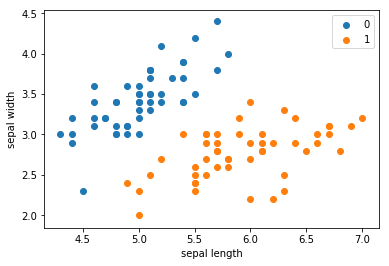

In [9]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [10]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=5, p=2):
        """
        :param X_train: array, X train data
        :param y_train: array, y train data (train labels)
        :param n_neighbors: int, number of neighbors
        :param p: int, distance metric
        """
        self.X_train = X_train
        self.y_train = y_train
        self.n = n_neighbors
        self.p = p
        
    def predict(self, X):
        """
        Predict label from X.
        :param X: array, 1 dim
        """
        knn_list = []
        for i in range(self.n):
            distance = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((distance, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            max_idx = knn_list.index(max(knn_list, key=lambda x: x[0])) # index of the farthest point in knn_list
            distance = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_idx][0] > distance:
                knn_list[max_idx] = (distance, self.y_train[i]) # eliminate the farthest point
                
        # stat
        knn = [k[-1] for k in knn_list]  # labels
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x: x)[-1]  # the max count(label type) in knn_list
        return max_count
    
    def score(self, X_test, y_test):
        """
        Calculate score for test dataset.
        """
        right_count = 0
        for X, y in zip(X_test, y_test):
            pred_label = self.predict(X)
            if pred_label == y:
                right_count += 1
        return right_count / len(X_test)

In [12]:
clf = KNN(X_train, y_train)

In [13]:
clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.9666666666666667

In [15]:
test_point = [5.2, 3.2]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 0.0


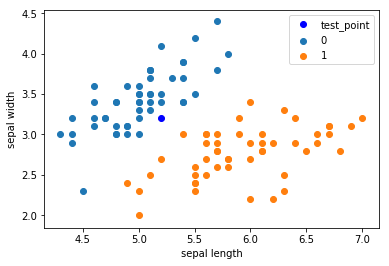

In [16]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [17]:
# sklearn
from sklearn.neighbors import KNeighborsClassifier

In [18]:
clf_sk = KNeighborsClassifier(n_neighbors=3, p=10)
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=10,
           weights='uniform')

In [19]:
clf_sk.score(X_test, y_test)

1.0

In [20]:
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt    # k维向量节点(k维空间中的一个样本点)
        self.split = split        # 整数（进行分割维度的序号）
        self.left = left          # 该结点分割超平面左子空间构成的kd-tree
        self.right = right        # 该结点分割超平面右子空间构成的kd-tree

class KdTree(object):
    def __init__(self, data):
        k = len(data[0])    # 数据维度
        
        def create_node(split, data_set):  # 按第split维划分数据集创建KdNode
            if not data_set:
                return None

            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  # 整数除法
            median = data_set[split_pos]    # 中位数分隔点
            split_next = (split + 1) % k
            
            return KdNode(median, split, 
                          create_node(split_next, data_set[:split_pos]),     # 创建左子树
                          create_node(split_next, data_set[split_pos + 1:])) # 创建右子树
        
        self.root = create_node(0, data)
        
def preorder(root):
    print (root.dom_elt)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [21]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple('Result_tuple', 'nearest_point nearest_distance nodes_visited')

def find_nearest(tree, point):
    k = len(point)
    def travel(kd_node, target, max_distance):
        if kd_node is None:
            return result([0] * k, float('inf'), 0)  # python中用float("inf")和float("-inf")表示正负无穷
        
        nodes_visited = 1
        s = kd_node.split
        pivot = kd_node.dom_elt
        
        if target[s] <= pivot[s]:
            nearer_node = kd_node.left
            further_node = kd_node.right
        else:
            nearer_node = kd_node.right
            further_node = kd_node.left
            
        tmp1 = travel(nearer_node, target, max_distance)  # 进行遍历找到包含目标点的区域
        
        nearest = tmp1.nearest_point  # 以此叶结点作为“当前最近点”
        distance = tmp1.nearest_distance  # 更新最近距离
        
        nodes_visited += tmp1.nodes_visited
        
        if distance < max_distance:
            max_distance = distance  # 最近点将在以目标点为球心，max_distance为半径的超球体内
            
        tmp_distance = abs(pivot[s] - target[s])  # 第s维上目标点与分割超平面的距离
        if max_distance < tmp_distance:  # 判断超球体是否与超平面相交
            return result(nearest, distance, nodes_visited)  # 不相交则可以直接返回，不用继续判断
        
        # 计算目标点与分割点的欧氏距离
        tmp_distance = sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(pivot, target)))
        
        if tmp_distance < distance:  # 如果有必要更新
            nearest = pivot  # 更新最近点
            distance = tmp_distance  # 更新最近距离
            max_distance = distance  # 更新超球体半径
            
        # 检查另一个子结点对应的区域是否有更近的点
        tmp2 = travel(further_node, target, max_distance)
        
        nodes_visited += tmp2.nodes_visited
        if tmp2.nearest_distance < distance:  # 如果另一个子结点内存在更近距离
            nearest = tmp2.nearest_point  # 更新最近点
            distance = tmp2.nearest_distance # 更新最近距离
            
        return result(nearest, distance, nodes_visited)
    
    return travel(tree.root, point, float('inf'))  # 从根节点开始递归

In [22]:
data = [[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [23]:
import time
from random import random

In [24]:
# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]

# 产生n个k维随机向量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [25]:
ret = find_nearest(kd, [3, 4.5])
print (ret)

Result_tuple(nearest_point=[2, 3], nearest_distance=1.8027756377319946, nodes_visited=4)


In [26]:
N = 1000000
t0 = time.perf_counter()
kd2 = KdTree(random_points(5, N))
ret2 = find_nearest(kd2, [0.1, 0.4, 0.7, 0.5, 0.8])
t1 = time.perf_counter()
print ('time: ', t1 - t0, 's')
print (ret2)

time:  15.461612399 s
Result_tuple(nearest_point=[0.09787656034148018, 0.39707719334331204, 0.7093918207460856, 0.4896687643859461, 0.7580779549983538], nearest_distance=0.044333400254159445, nodes_visited=146)
